## Implementing Linear Regression Using Gradient Descent 

In this lab, you will be implementing the Linear Regression Model on the same data set as in Lab_1a , but here we will be using the gradient descent algorithm (GDA) and the stochastic gradient descent algorithm (SGDA) to minimize the cost function as we covered in the class.

Please add your own print statements to check your code to ensure your code is correct in every step.  (Note: we will not be grading the print statements you add to your code.)

In [2]:
# run this code cell using shift+enter before moving further
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

# Loading the data set.

In the below code cell, you will load the data using python pandas library as done in the programming_assignment_1a. Use pd.read_csv('File url ', header=None,.... ) with the value of header=None,delim_whitespace=True,names=names,na_values='?' as attributes. The url for the .data file is https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data. This step is same as done in programming_assignment_1a.  You could have found the names by inspecting the dataset's metadata, at https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names.

In [6]:
# After completing the code in this code cell, run this code cell before moving further.
names =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

#Write your code below to save dataframe in the df variable below. 
# In place of None, write the pandas command to read the csv file.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header = None,delim_whitespace=True, names = names, na_values='?')


Fetch the values from the 'PRICE' and 'RM' columns. into a smaller dataframe named df1 from df. This step is the same as was done in programming_assignment_1a.  Then drop rows with NaN values from df1, and save the result in df2.

In [7]:
#  After completing the code in this code cell, run this code cell before moving further. 
# Write your code below.
df1= df[['PRICE','RM']]
df2= df1.dropna()
print (df2.shape)
# Check the shape of df2. It should be (506,2)


(506, 2)


Create a vector y having the values of 'PRICE' column and vector x having the values of 'RM' column. This step is also same as done in programming_assignment_1a.

In [8]:
# After completing the code in this code cell, run this code cell before moving further. 
# Write your code below.
x= df['RM']
y= df['PRICE']
print(y.shape)
print(x.shape)
# Check the shape of x and y vectors.


(506,)
(506,)


Reshape x and y to be rank 2 (here we refer to the number of dimentions of a array as it's rank). After checking the shape of x and y in the above code cell, we see that x and y are rank 1 matricies. Before proceeding,  convert them to be rank 2 matricies. For example, you could use the command x=x.reshape(x.shape[0],1) to reshape x.

In [9]:
# After completing the code in this code cell, run this code cell before moving further. 
# Write your code below
x=x.reshape(x.shape[0],1)
y=y.reshape(x.shape[0],1)
print(x.shape)



(506, 1)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


# Plotting the data.
Plot the dataset by running the code cell below.

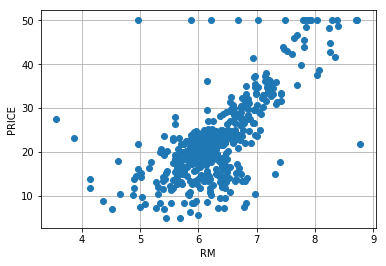

In [10]:
# Just run this code cell.
%matplotlib inline
plt.plot(x,y,'o')
plt.xlabel("RM")
plt.ylabel('PRICE')
plt.grid(True)

Calculating the value of n, i.e. number of training examples. 
Hint: Value of n is equal to the number of rows in either x or y matrix which can be accessed using the numpy shape command.

In [11]:
# After completing the code in this code cell, run this code cell before moving further. 
# Write your code below
n= x.shape[0]
print(n)
# After writing a code, it is a good practice to verify that your code is correct. 
# For example, in this case you can print the value of n and check that it should be equal to 506.
# Occasionally we created test code cell to verify your code. 
# However, you should do it for almost every code you write.

506


Compute the cost: Write the code to compute the cost inside the function. Do not change the function name or function parameters.

In [12]:
def compute_cost(x, y, beta0, beta1, n):
    #Write your code in place of None. Cost can be calculated using a single line of code
    cost= np.sum((y - (beta0 + beta1*x))**2) / (2*n)
    
    return cost

Before moving ahead, ensure that the code you have written to compute the cost is correct. Just run the below cell.

In [13]:
cost_verify= compute_cost(x, y, 0, 0, n)

print(cost_verify)

296.073458498


Your output should be equal to 296.073458498.  Ensure your answer is correct before continuing

# Gradient Descent
Write the code to perform gradient descent in the function below.  In this assigment, we will run the algorithm a fixed number of iterations.  Later in the course, we will add a simple extension by adding a stopping criteria.

In [46]:
def gradient_descent(x, y, learning_rate, beta0, beta1, n, num_iters):
    # In place of None, write the updated value of beta0 in temp0 and of beta1 in temp1
    for i in range(num_iters):
        temp0 =   beta0 - np.sum((learning_rate) * (beta0 + beta1*x - y))
        temp1 =   beta1 - np.sum(((learning_rate) * (beta0 + beta1*x - y)*x))
        beta0 = temp0
        beta1 = temp1
        
        
        # In place of None, call the cost you just coded above
        cost= compute_cost(x, y, beta0, beta1, n)
        #print("Step " + str(i+1) + ": " + " beta 0: " + str(beta0) + "beta 1: " + str(beta1) )
        print(beta0,beta1)
    
    
    return beta0,beta1       

Before moving ahead, ensure that your code to update beta0 and beta1 is correct. Run the code cell below.

In [47]:
g=gradient_descent(4, -3, 0.5, 0, 0, n, 4)

-1.5 -6.0
9.75 39.0
-74.625 -298.5
558.1875 2232.75


The last output should be: -34.3837376153. Ensure that you have the correct result before continuing.

# Integerating the Batch Gradient Descent Function 

Using the above code, create a single function linear_reg_model_gda: This function uses the gradient descent algorithm to minimize the cost.

In [302]:
def linear_reg_model_gda(x, y, n, learning_rate, num_iters):
    #initialize the values of parameters beta0 and beta1 both to 0
    beta0=0
    beta1=0
    
    #calculate the initial cost by calling the function you just coded above
    initial_cost=compute_cost(x,y,beta0,beta1,n)
    print("Initial Cost")
    print(initial_cost)
    
    #calculate the optimized value of beta0 and beta1 by calling the gradient_descent function coded above
    
    beta0,beta1= gradient_descent(x, y, 0.04, 0, 0, n, 10000)
    
    #Calculate the cost with the optimized value of beta0 and beta1 by calling the cost function.
    
    final_cost=compute_cost(x,y,beta0,beta1,n)
    print("Final Cost")
    print(final_cost)
    return beta0,beta1
    

Now, when you have completed the linear_reg_model_gda function, you can use this function to find the optimized values of beta0 and beta1. Using it, set the values of learning_rate and num_iters to something reasonable. You may have to call this function several times with different values of num_iters and learning_rate to find the optimal values of beta0 and beta1. For some values of learning_rate, you may recieve incorrect values of beta0 and beta1, wherein they reach a very large value(infinity) due to overshooting as was discussed in class. Finally, the values of beta0, beta1 and cost(RSS) should be same(or very close to) the ones in programming_assignment_1a.

In [303]:
# Write your code below
learning_rate=0.04
num_iters=Non=10000
# In place of None, call the linear_reg_model_gda.
beta0,beta1 = linear_reg_model_gda(x, y, n, learning_rate, num_iters)

Initial Cost
296.073458498
Cost
294.211536124
Betas
0.00189723320158
0.0124743083004
Cost
170.025517407
Betas
0.153799541417
0.975955794892
Cost
95.2964785109
Betas
0.278409052376
1.79315235378
Cost
48.7132755213
Betas
0.393079528597
2.60810503928
Cost
42.163338681
Betas
0.421731899583
2.78769133929
Cost
44.3301837746
Betas
0.411480358144
2.72404314364


IndexError: index 506 is out of bounds for axis 0 with size 506

# Predicting the Price of a House

Use your function to train your linear regression model to find the optimal values for $\beta_0$ and $\beta_1$.  Once you have the optimal values for the parameters, you can predict the value of $y$ (price) using $x$ (rm).  Compute the function below to prdict $y$, using $x$, $\beta_0$ and $\beta_1$

In [304]:
def predict(x, beta0, beta1):
    predicted_y = beta0 = beta1*x
    
    return predicted_y

Now, predict the price of a house with rm=6 using ```predict()```. 

In [305]:
# Call the predict function with rm=6 
y_predict = predict(6, beta0, beta1)
print(y_predict)

[  9.19248830e+09]


The value should be approximately 19.54424 

# Normal Equation Method
Now, we will be writing the code to find the values of parameters beta0 and beta1 for our linear regression model. This can also be used to cross-check the optimal values of beta0 and beta1 we just found above using the above two models. These values should be approximately the same.

Step 1: Appending a column of ones to x in the left. Save this into X. You can first create a column vector of ones say 'a' (ensure this to have dimension (n,1) i.e. a rank 2 array). Now, you can use np.hstack to append it to the left of x.

In [306]:
#Write the code below
a = np.ones((506,1))
X = np.hstack((a,x))

Step 2: Instead of writing the code for normal equation in one line, you can break this into 3 parts: First calculate q=inverse of (dot of (X.T,X)) (these are pseudo commands, use original numpy commands to calculate q). Then w= dot of ( X.T , y) and then beta_vec= dot of (q,w). Here, beta_vec is vector of dimension (2,1) having two values. Example beta0=beta_vec[0][0]

In [307]:
# Write the code below
q = np.dot(X.T,X)
w = np.dot(X.T,y)
beta_vec = np.dot(q,w)
beta0 = beta_vec[0]
beta1 = beta_vec[1]

In [308]:
print("Beta0 is " + str(beta0))
print("Beta1 is " + str(beta1))

Beta0 is [  2.40849624e+08]
Beta1 is [  1.53208138e+09]


The Values of beta0 and beta1 you just got above should be approximately the same as the ones you got using linear_reg_model_gda or linear_reg_model_sgda.


# Optional (The following will not be graded):  
# Stochastic Gradient Descent

You can read more about stochastic gradient descent: https://en.wikipedia.org/wiki/Stochastic_gradient_descent

To prevent cycles, shuffle the data for each pass.

Write the code to perform a stochastic gradient descent. Remember, every update in a sgda uses examples one by one.

In [ ]:
def stochastic_gradient_descent(x, y, learning_rate, beta0, beta1, n, num_iters):

    for j in range(num_iters):
    
        for i in range(0,n):
        # Write updated value in beta0 in temp0 and of beta1 in temp1
            temp0 = None 
            temp1 = None
            beta0 = temp0
            beta1 = temp1   

        if(j%2000==0):
            cost= compute_cost(x,y,beta0,beta1,n)
            print("Cost")
            print(cost)
            print("Betas")
            print(beta0)
            print(beta1)           
            
    return beta0,beta1

Before moving ahead, ensure that your code to update beta0 and beta1 is correct. Run the code cell below. This may take some time to run completely.

In [ ]:
g=stochastic_gradient_descent(x, y, 0.0048, 0, 0, n, 10000)
print(g[0])

The result should be: -17.98968896 . Ensure that your answer is correct before continuing.

# Integrating the Stochastic Gradient Descent Algorithm

Use this function to complete linear_reg_model_sgda(). This function uses stochastic gradient descent to minimize the cost.

In [ ]:
def linear_reg_model_sgda(x, y, n, learning_rate, num_iters):
    
     #initialize the values of parameters beta0 and beta1 both to 0
    beta0=0
    beta1=0
    
    #calculate the initial cost by calling the function cost you just coded above
    print("Initial Cost")
    initial_cost= compute_cost(x,y,beta0,beta1,n)
    print(initial_cost)
    
    #calculate the optimized value of beta0 and beta1 by calling the stochastic_gradient_descent function coded above
    
    beta0,beta1= stochastic_gradient_descent(x, y, learning_rate, beta0, beta1, n, num_iters)
    
    #Calculate the cost with the optimized value of beta0 and beta1 by calling the cost function.
    
    final_cost=compute_cost(x,y,beta0,beta1,n)
    print("Final_cost")
    print(final_cost)
    return beta0,beta1

Now, when you have completed linear_reg_model_sgda function, you can call this function to find the optimized values of beta0 and beta1. Before calling the function, set the values of learning_rate and num_iters appropriately. You may have to call this function several times with different values of num_iters and learning_rate to find the optimal values of beta0 and beta1. For a sufficiently high learning_rate, it may return extremely high values for beta0 and beta1 (infinity). Finally, the values of beta0, beta1 and cost(RSS) should be same(or nearly the same) as you got in the programming_assignment1a.

In [ ]:
# Write your code below
learning_rate = 0.045
num_iters = 10000
# In place of None call the function linear_reg_model_sgda.
beta0,beta1 = linear_reg_model_sgda(x, y, n, learning_rate, num_iters)